In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path='/content/drive/MyDrive/Machine_Learning_Models_Udemy/NLP_Campus_X/NLP_Project-Duplicate_Question_pair/q_quora.csv'
df = pd.read_csv(path)
df = df.drop(['Unnamed: 6',	'Unnamed: 7'	,'Unnamed: 8'	,'Unnamed: 9',	'Unnamed: 10',	'Unnamed: 11',	'Unnamed: 12'], axis=1)
new_df = df.copy()

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
new_df.shape

(404351, 6)

## Exploratory Data Analysis



In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.5+ MB


In [ ]:
# missing values
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
# new_df['question1'].isnull()
missing_both = new_df[new_df['question1'].isnull()]
missing_both

,id,qid1,qid2,question1,question2,is_duplicate
363416,363416,711434,711435,NaN,My Chinese name is Haichao Yu. What English na...,0


In [ ]:
missing_both_2 = new_df[new_df['question2'].isnull()]
missing_both_2

,id,qid1,qid2,question1,question2,is_duplicate
105796,105796,209841,209842,How can I develop android app?,NaN,0
201871,201871,398348,398349,How can I create an Android app?,NaN,0


In [ ]:
missing_either = new_df[new_df['question1'].isnull() | new_df['question2'].isnull()]

# Print the resulting rows
print("Rows with missing values in either question1 or question2:")
print(missing_either)

# Drop the rows with missing values in either question1 or question2
new_df = new_df.dropna(subset=['question1', 'question2'])



Rows with missing values in either question1 or question2:
            id    qid1    qid2                         question1  \
105796  105796  209841  209842    How can I develop android app?   
201871  201871  398348  398349  How can I create an Android app?   
363416  363416  711434  711435                               NaN   

                                                question2 is_duplicate  
105796                                                NaN            0  
201871                                                NaN            0  
363416  My Chinese name is Haichao Yu. What English na...            0  


In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
new_df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
# check for duplicate rows
new_df.duplicated().sum()

0

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404348 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404348 non-null  int64 
 1   qid1          404348 non-null  int64 
 2   qid2          404348 non-null  int64 
 3   question1     404348 non-null  object
 4   question2     404348 non-null  object
 5   is_duplicate  404348 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.6+ MB


In [ ]:
# Distribution of duplicate and non-duplicate questions


# Use a boolean mask to find rows where the 'is_duplicate' column contains non-numeric values
alphanumeric_mask = new_df['is_duplicate'].apply(lambda x: not str(x).isdigit())
alphanumeric_rows_count = alphanumeric_mask.sum()
print(f"Number of rows with alphabetical values in 'is_duplicate': {alphanumeric_rows_count}")
df_cleaned = new_df[~alphanumeric_mask]

# Save the cleaned DataFrame to a new CSV file (optional)
df_cleaned.to_csv('/content/drive/MyDrive/Machine_Learning_Models_Udemy/NLP_Campus_X/NLP_Project-Duplicate_Question_pair/q_quora_cleaned.csv', index=False)


Number of rows with alphabetical values in 'is_duplicate': 336


In [ ]:
df_cleaned.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
# Shape of cleaned dataset
df_cleaned.shape

(404012, 6)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404012 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404012 non-null  int64 
 1   qid1          404012 non-null  int64 
 2   qid2          404012 non-null  int64 
 3   question1     404012 non-null  object
 4   question2     404012 non-null  object
 5   is_duplicate  404012 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.6+ MB


In [ ]:
df_cleaned[['is_duplicate']] = df_cleaned[['is_duplicate']].apply(pd.to_numeric)

In [ ]:
# missing values
df_cleaned.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
# check for duplicate rows
df_cleaned.duplicated().sum()

0

is_duplicate
0    254745
1    149267
Name: count, dtype: int64
is_duplicate
0    63.05382
1    36.94618
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

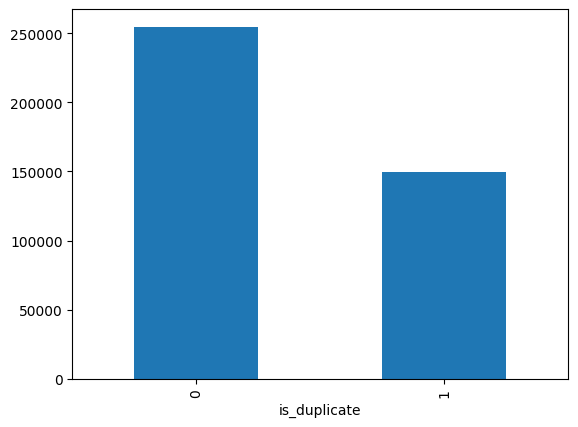

In [ ]:
# Distribution of duplicate and non-duplicate questions
# print(new_df['is_duplicate'].head())
print(df_cleaned['is_duplicate'].value_counts())
print((df_cleaned['is_duplicate'].value_counts()/df_cleaned['is_duplicate'].count())*100)
df_cleaned['is_duplicate'].value_counts().plot(kind='bar')
# new_df['is_duplicate'].value_counts()

In [ ]:
# Repeated questions

qid = pd.Series(df_cleaned['qid1'].tolist() + df_cleaned['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789148
Number of questions getting repeated 13675


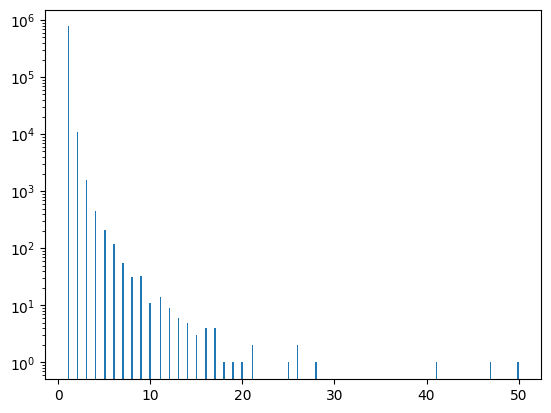

In [ ]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=250)
plt.yscale('log')
plt.show()

In [ ]:
sample_df = df_cleaned.sample(85000,random_state=0)

## Text Preprocessing

In [ ]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    q = q.replace('?', '')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    # q = q.replace("'s", " is")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    # q=  " ".join([ps.stem(word) for word in q.split()])


    return q

In [ ]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [ ]:
# Stemming
from nltk.stem.porter  import PorterStemmer
ps=PorterStemmer()

def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
sample_df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
241448,241448,475579,475580,Can I laminate my social security card?,Why can't you laminate social security cards?,1
113984,113984,225977,18062,How do I go about getting a sugar daddy?,How do I acquire a sugar daddy?,1
135921,135921,269126,269127,Where can I buy marijuana seeds in India?,Where the best website to buy marijuana seeds ...,0
240032,240032,472798,405787,What is the difference between build and relea...,"In Software Testing, what is the difference be...",0
255965,255965,503820,503821,Do some women like having sex with trans-sexua...,How do female-to-male gender reassignment surg...,0
110526,110526,219173,219174,Which is best book for linear integrated circuit?,What are some good books for analog and digita...,0
304539,304539,597990,597991,What is the meaning of Hindi word 'Anushasan'?,What is the meaning of Hindi Word 'Shrap'?,0
160929,160929,318181,318182,Is a PhD required to be a physics research ass...,I have a PhD in Physics. I had technical/resea...,0
319799,319799,627433,627434,What are some of most interesting and unknown ...,What are the 8 amazing facts about Shah Rukh K...,1
157707,157707,311863,311864,How can I learn maths online?,Where can I learn maths online?,1


In [ ]:
sample_df['question1'] = sample_df['question1'].apply(preprocess)
sample_df['question2'] = sample_df['question2'].apply(preprocess)

In [ ]:
sample_df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
241448,241448,475579,475580,can i laminate my social security card,why can not you laminate social security cards,1
113984,113984,225977,18062,how do i go about getting a sugar daddy,how do i acquire a sugar daddy,1
135921,135921,269126,269127,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...,0
240032,240032,472798,405787,what is the difference between build and relea...,in software testing what is the difference be...,0
255965,255965,503820,503821,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...,0
110526,110526,219173,219174,which is best book for linear integrated circuit,what are some good books for analog and digita...,0
304539,304539,597990,597991,what is the meaning of hindi word anushasan,what is the meaning of hindi word shrap,0
160929,160929,318181,318182,is a phd required to be a physics research ass...,i have a phd in physics i had technical resea...,0
319799,319799,627433,627434,what are some of most interesting and unknown ...,what are the 8 amazing facts about shah rukh khan,1
157707,157707,311863,311864,how can i learn maths online,where can i learn maths online,1


In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85000 entries, 241448 to 26180
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            85000 non-null  int64 
 1   qid1          85000 non-null  int64 
 2   qid2          85000 non-null  int64 
 3   question1     85000 non-null  object
 4   question2     85000 non-null  object
 5   is_duplicate  85000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.5+ MB


## Advance Features added In Dataset As Columns

In [ ]:
sample_df['q1_len'] = sample_df['question1'].str.len()
sample_df['q2_len'] = sample_df['question2'].str.len()

In [ ]:
sample_df['q1_num_words'] = sample_df['question1'].apply(lambda row: len(row.split(" ")))
sample_df['q2_num_words'] = sample_df['question2'].apply(lambda row: len(row.split(" ")))
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
241448,241448,475579,475580,can i laminate my social security card,why can not you laminate social security cards,1,38,46,7,8
113984,113984,225977,18062,how do i go about getting a sugar daddy,how do i acquire a sugar daddy,1,39,30,9,7
135921,135921,269126,269127,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...,0,40,52,8,9
240032,240032,472798,405787,what is the difference between build and relea...,in software testing what is the difference be...,0,68,84,11,18
255965,255965,503820,503821,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...,0,54,56,10,9


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
sample_df['word_common'] = sample_df.apply(common_words, axis=1)
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
241448,241448,475579,475580,can i laminate my social security card,why can not you laminate social security cards,1,38,46,7,8,4
113984,113984,225977,18062,how do i go about getting a sugar daddy,how do i acquire a sugar daddy,1,39,30,9,7,6
135921,135921,269126,269127,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...,0,40,52,8,9,4
240032,240032,472798,405787,what is the difference between build and relea...,in software testing what is the difference be...,0,68,84,11,18,9
255965,255965,503820,503821,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...,0,54,56,10,9,1


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
sample_df['word_total'] = sample_df.apply(total_words, axis=1)
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
241448,241448,475579,475580,can i laminate my social security card,why can not you laminate social security cards,1,38,46,7,8,4,15,0.27
113984,113984,225977,18062,how do i go about getting a sugar daddy,how do i acquire a sugar daddy,1,39,30,9,7,6,16,0.38
135921,135921,269126,269127,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...,0,40,52,8,9,4,17,0.24
240032,240032,472798,405787,what is the difference between build and relea...,in software testing what is the difference be...,0,68,84,11,18,9,26,0.35
255965,255965,503820,503821,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...,0,54,56,10,9,1,19,0.05


In [ ]:
sample_df['word_share'] = round(sample_df['word_common']/sample_df['word_total'],2)
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
241448,241448,475579,475580,can i laminate my social security card,why can not you laminate social security cards,1,38,46,7,8,4,15,0.27
113984,113984,225977,18062,how do i go about getting a sugar daddy,how do i acquire a sugar daddy,1,39,30,9,7,6,16,0.38
135921,135921,269126,269127,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...,0,40,52,8,9,4,17,0.24
240032,240032,472798,405787,what is the difference between build and relea...,in software testing what is the difference be...,0,68,84,11,18,9,26,0.35
255965,255965,503820,503821,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...,0,54,56,10,9,1,19,0.05


In [ ]:
sample_df = sample_df[(sample_df['question1'].str.strip() != '') & (sample_df['q1_len'] != 0)]
sample_df = sample_df[(sample_df['question2'].str.strip() != '') & (sample_df['q2_len'] != 0)]
# df = df[(df['question1'].str.strip() != '') & (df['q1len'] != 0)]
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84996 entries, 241448 to 26180
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            84996 non-null  int64  
 1   qid1          84996 non-null  int64  
 2   qid2          84996 non-null  int64  
 3   question1     84996 non-null  object 
 4   question2     84996 non-null  object 
 5   is_duplicate  84996 non-null  int64  
 6   q1_len        84996 non-null  int64  
 7   q2_len        84996 non-null  int64  
 8   q1_num_words  84996 non-null  int64  
 9   q2_num_words  84996 non-null  int64  
 10  word_common   84996 non-null  int64  
 11  word_total    84996 non-null  int64  
 12  word_share    84996 non-null  float64
dtypes: float64(1), int64(10), object(2)
memory usage: 9.1+ MB


# Analysis of Advance Features added In Dataset As Columns

minimum Characters 2
maximum Characters 433
Average num of Characters 58


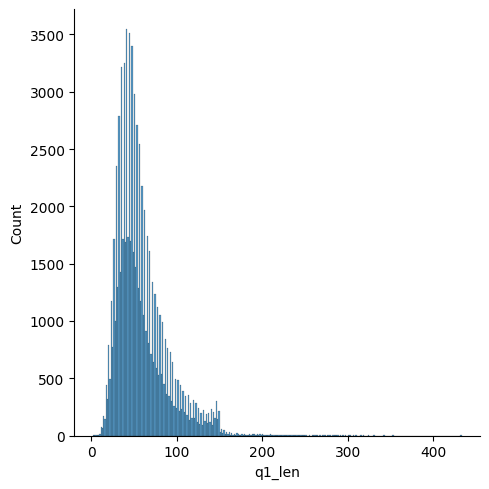

In [ ]:
# Q1 Length Feature EDA
sns.displot(sample_df['q1_len'])
print('minimum Characters',sample_df['q1_len'].min())
print('maximum Characters',sample_df['q1_len'].max())
print('Average num of Characters',int(sample_df['q1_len'].mean()))

In [ ]:
rows_with_min_q1len = sample_df[sample_df['q1_len'] == sample_df['q1_len'].min()]
rows_with_min_q1len.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
270185,270185,531416,531417,ok,what would you do if you were wealthy,0,2,37,1,8,0,8,0.00
325580,325580,638618,638619,my,my boyfriend told me he was not as attracted t...,0,2,172,1,41,1,31,0.03


minimum Characters 1
maximum Characters 1160
Average num of Characters 59


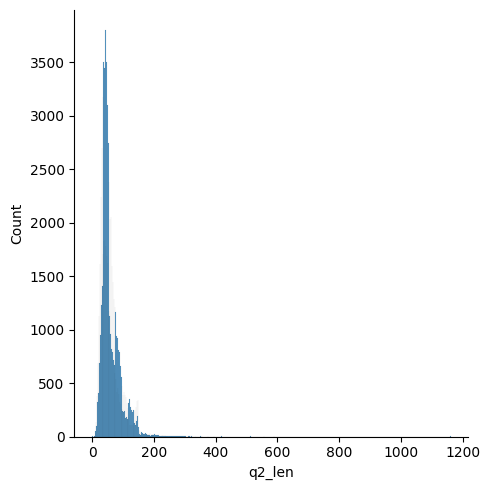

In [ ]:
# Q2 Length Feature EDA
sns.displot(sample_df['q2_len'])
print('minimum Characters',sample_df['q2_len'].min())
print('maximum Characters',sample_df['q2_len'].max())
print('Average num of Characters',int(sample_df['q2_len'].mean()))

minimum Characters 1
maximum Characters 85
Average num of Characters 11


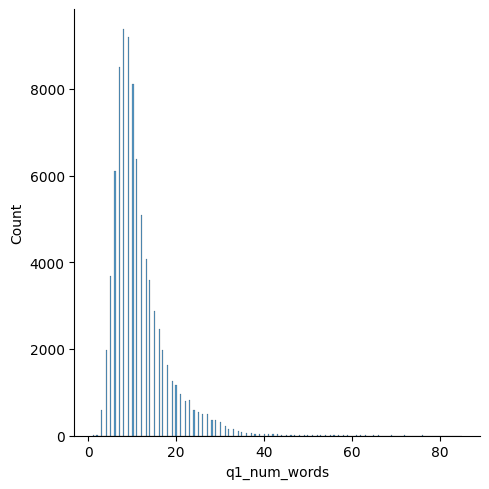

In [ ]:
# Q1 Number of Words Feature EDA
sns.displot(sample_df['q1_num_words'])
print('minimum Characters',sample_df['q1_num_words'].min())
print('maximum Characters',sample_df['q1_num_words'].max())
print('Average num of Characters',int(sample_df['q1_num_words'].mean()))

minimum Characters 1
maximum Characters 268
Average num of Characters 11


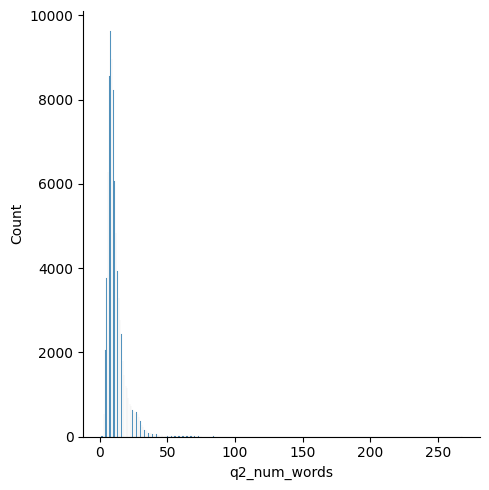

In [ ]:
# Q2 Number of Words Feature EDA
sns.displot(sample_df['q2_num_words'])
print('minimum Characters',sample_df['q2_num_words'].min())
print('maximum Characters',sample_df['q2_num_words'].max())
print('Average num of Characters',int(sample_df['q2_num_words'].mean()))

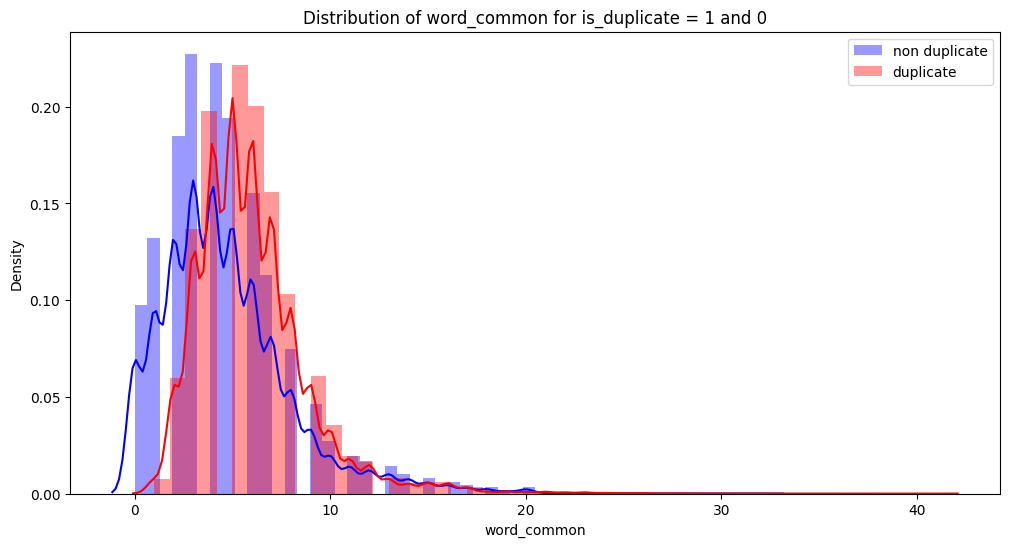

In [ ]:
# common words


df_duplicate_1 = sample_df[sample_df['is_duplicate'] == 1]
df_duplicate_0 = sample_df[sample_df['is_duplicate'] == 0]

# # Step 3: Plot the distributions using Seaborn
plt.figure(figsize=(12, 6))
sns.distplot(df_duplicate_0['word_common'], kde=True, color='blue',label='non duplicate' )
sns.distplot(df_duplicate_1['word_common'], kde=True, color='red',label='duplicate')

# # Add legend
plt.legend()
plt.title('Distribution of word_common for is_duplicate = 1 and 0')
plt.xlabel('word_common')
plt.ylabel('Density')
plt.show()
# print(df_duplicate_1)

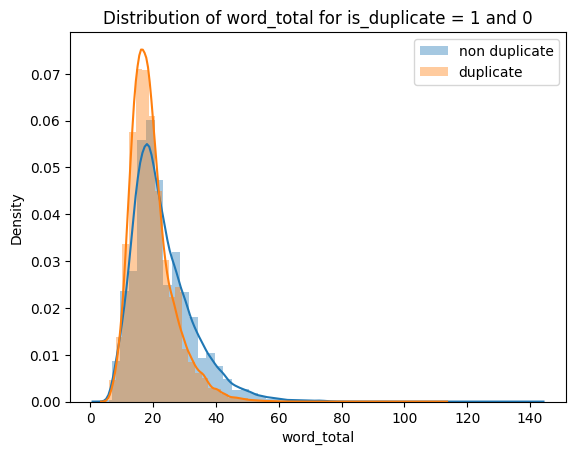

In [ ]:

sns.distplot(sample_df[sample_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(sample_df[sample_df['is_duplicate'] == 1]['word_total'],label='duplicate')



# # Add legend
plt.legend()
plt.title('Distribution of word_total for is_duplicate = 1 and 0')
plt.xlabel('word_total')
plt.ylabel('Density')
plt.show()


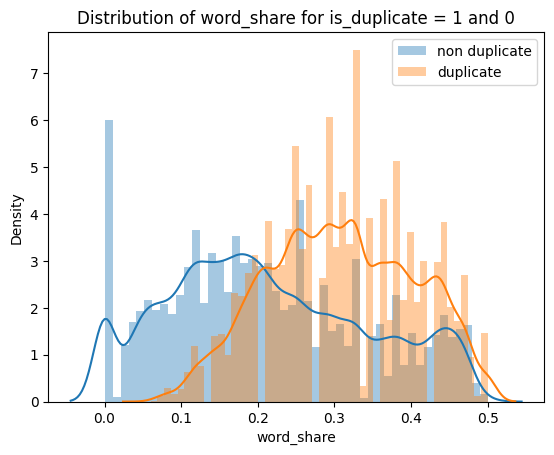

In [ ]:

sns.distplot(sample_df[sample_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(sample_df[sample_df['is_duplicate'] == 1]['word_share'],label='duplicate')



# # Add legend
plt.legend()
plt.title('Distribution of word_share for is_duplicate = 1 and 0')
plt.xlabel('word_share')
plt.ylabel('Density')
plt.show()

# Advance Features Regading Length, Stop Words

In [ ]:
# Advanced Features
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
token_features = sample_df.apply(fetch_token_features, axis=1)

sample_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
sample_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
sample_df["csc_min"]       = list(map(lambda x: x[2], token_features))
sample_df["csc_max"]       = list(map(lambda x: x[3], token_features))
sample_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
sample_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
sample_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
sample_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
241448,241448,475579,475580,can i laminate my social security card,why can not you laminate social security cards,1,38,46,7,8,...,15,0.27,0.749981,0.749981,0.333322,0.249994,0.571420,0.499994,0,0
113984,113984,225977,18062,how do i go about getting a sugar daddy,how do i acquire a sugar daddy,1,39,30,9,7,...,16,0.38,0.666644,0.499988,0.999975,0.799984,0.857131,0.666659,1,1
135921,135921,269126,269127,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...,0,40,52,8,9,...,17,0.24,0.749981,0.499992,0.333322,0.249994,0.499994,0.444440,0,1
240032,240032,472798,405787,what is the difference between build and relea...,in software testing what is the difference be...,0,68,84,11,18,...,26,0.35,0.599988,0.499992,0.999983,0.749991,0.818174,0.599996,0,0
255965,255965,503820,503821,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...,0,54,56,10,9,...,19,0.05,0.000000,0.000000,0.333322,0.249994,0.111110,0.099999,0,0


In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84996 entries, 241448 to 26180
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             84996 non-null  int64  
 1   qid1           84996 non-null  int64  
 2   qid2           84996 non-null  int64  
 3   question1      84996 non-null  object 
 4   question2      84996 non-null  object 
 5   is_duplicate   84996 non-null  int64  
 6   q1_len         84996 non-null  int64  
 7   q2_len         84996 non-null  int64  
 8   q1_num_words   84996 non-null  int64  
 9   q2_num_words   84996 non-null  int64  
 10  word_common    84996 non-null  int64  
 11  word_total     84996 non-null  int64  
 12  word_share     84996 non-null  float64
 13  cwc_min        84996 non-null  float64
 14  cwc_max        84996 non-null  float64
 15  csc_min        84996 non-null  float64
 16  csc_max        84996 non-null  float64
 17  ctc_min        84996 non-null  float64
 18  ctc_ma

In [ ]:
sample_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq'],
      dtype='object')

In [ ]:
pip install Distance

In [ ]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0
    # length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
length_features = sample_df.apply(fetch_length_features, axis=1)

sample_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
sample_df['mean_len'] = list(map(lambda x: x[1], length_features))
sample_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84996 entries, 241448 to 26180
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    84996 non-null  int64  
 1   qid1                  84996 non-null  int64  
 2   qid2                  84996 non-null  int64  
 3   question1             84996 non-null  object 
 4   question2             84996 non-null  object 
 5   is_duplicate          84996 non-null  int64  
 6   q1_len                84996 non-null  int64  
 7   q2_len                84996 non-null  int64  
 8   q1_num_words          84996 non-null  int64  
 9   q2_num_words          84996 non-null  int64  
 10  word_common           84996 non-null  int64  
 11  word_total            84996 non-null  int64  
 12  word_share            84996 non-null  float64
 13  cwc_min               84996 non-null  float64
 14  cwc_max               84996 non-null  float64
 15  csc_min            

In [ ]:
pip install fuzzywuzzy

In [ ]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
fuzzy_features = sample_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
sample_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
sample_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
sample_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
sample_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84996 entries, 241448 to 26180
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    84996 non-null  int64  
 1   qid1                  84996 non-null  int64  
 2   qid2                  84996 non-null  int64  
 3   question1             84996 non-null  object 
 4   question2             84996 non-null  object 
 5   is_duplicate          84996 non-null  int64  
 6   q1_len                84996 non-null  int64  
 7   q2_len                84996 non-null  int64  
 8   q1_num_words          84996 non-null  int64  
 9   q2_num_words          84996 non-null  int64  
 10  word_common           84996 non-null  int64  
 11  word_total            84996 non-null  int64  
 12  word_share            84996 non-null  float64
 13  cwc_min               84996 non-null  float64
 14  cwc_max               84996 non-null  float64
 15  csc_min            

In [ ]:
print(sample_df.shape)
sample_df.head()

(74996, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
241448,241448,475579,475580,can i laminate my social security card,why can not you laminate social security cards,1,38,46,7,8,...,0.499994,0,0,1,7.5,0.538462,81,84,81,86
113984,113984,225977,18062,how do i go about getting a sugar daddy,how do i acquire a sugar daddy,1,39,30,9,7,...,0.666659,1,1,2,8.0,0.451613,75,57,72,85
135921,135921,269126,269127,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...,0,40,52,8,9,...,0.444440,0,1,1,8.5,0.512195,67,69,54,77
240032,240032,472798,405787,what is the difference between build and relea...,in software testing what is the difference be...,0,68,84,11,18,...,0.599996,0,0,4,13.0,0.449275,53,61,72,89
255965,255965,503820,503821,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...,0,54,56,10,9,...,0.099999,0,0,1,9.5,0.054545,18,20,33,33


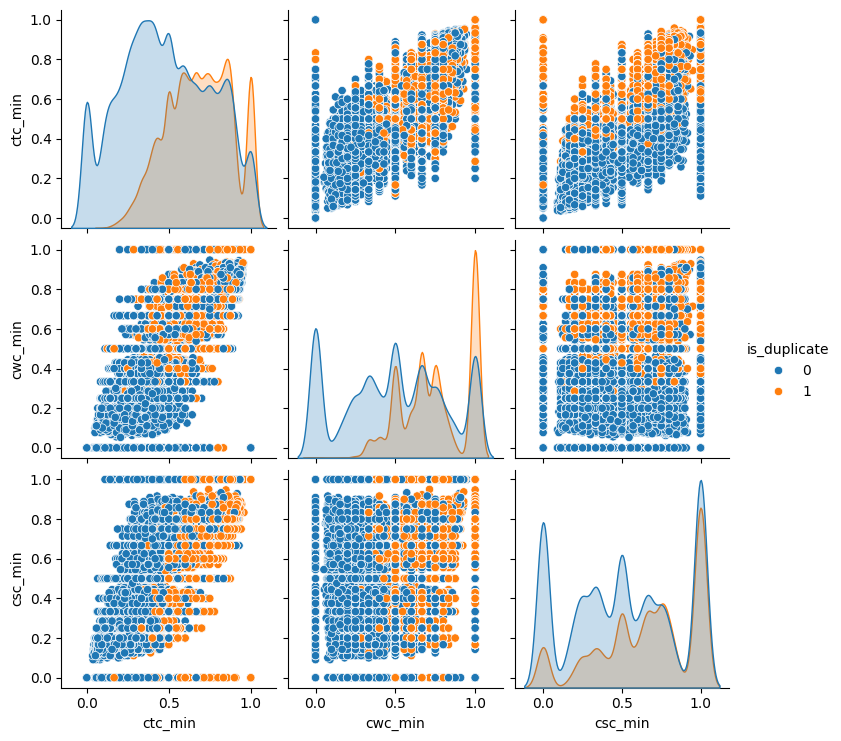

In [ ]:
sns.pairplot(sample_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

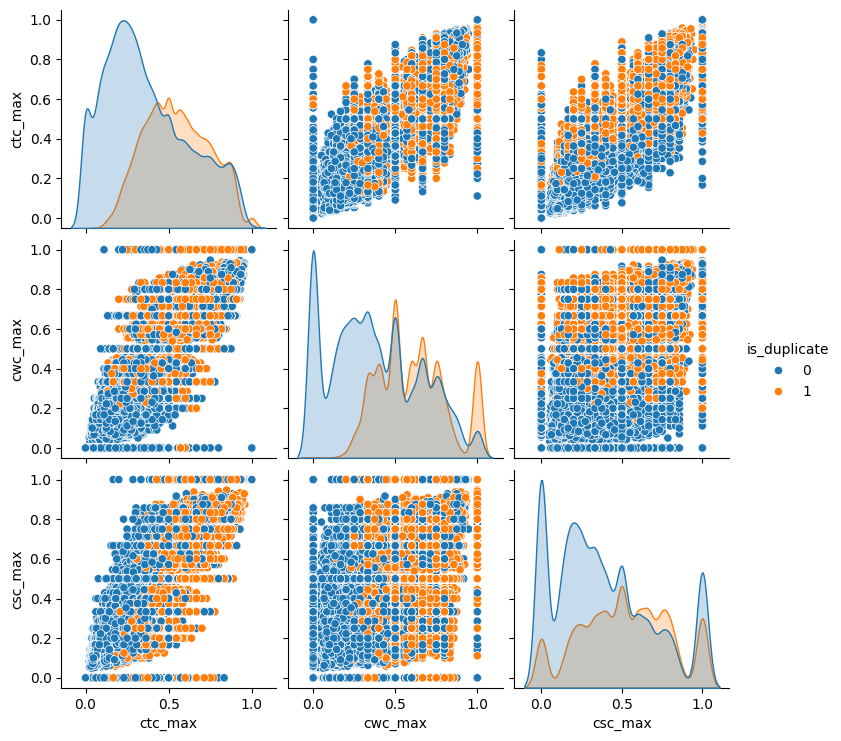

In [ ]:
sns.pairplot(sample_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

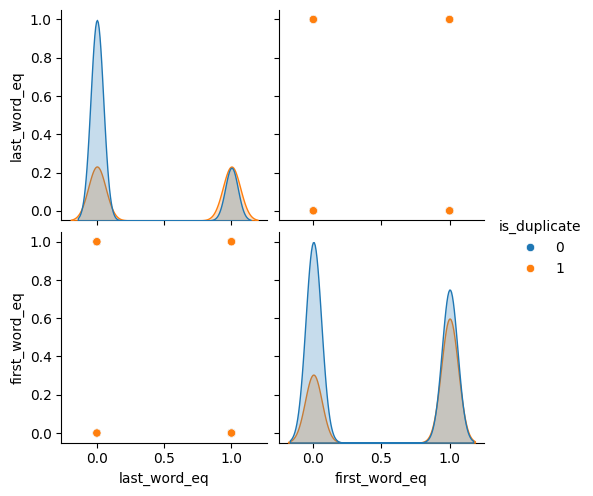

In [ ]:
sns.pairplot(sample_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

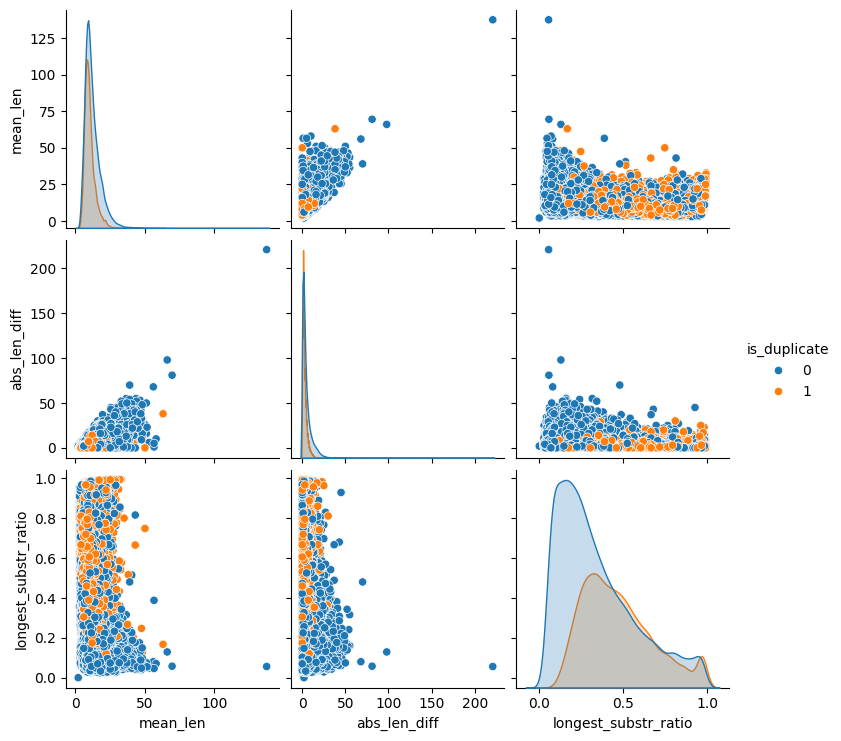

In [ ]:
sns.pairplot(sample_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

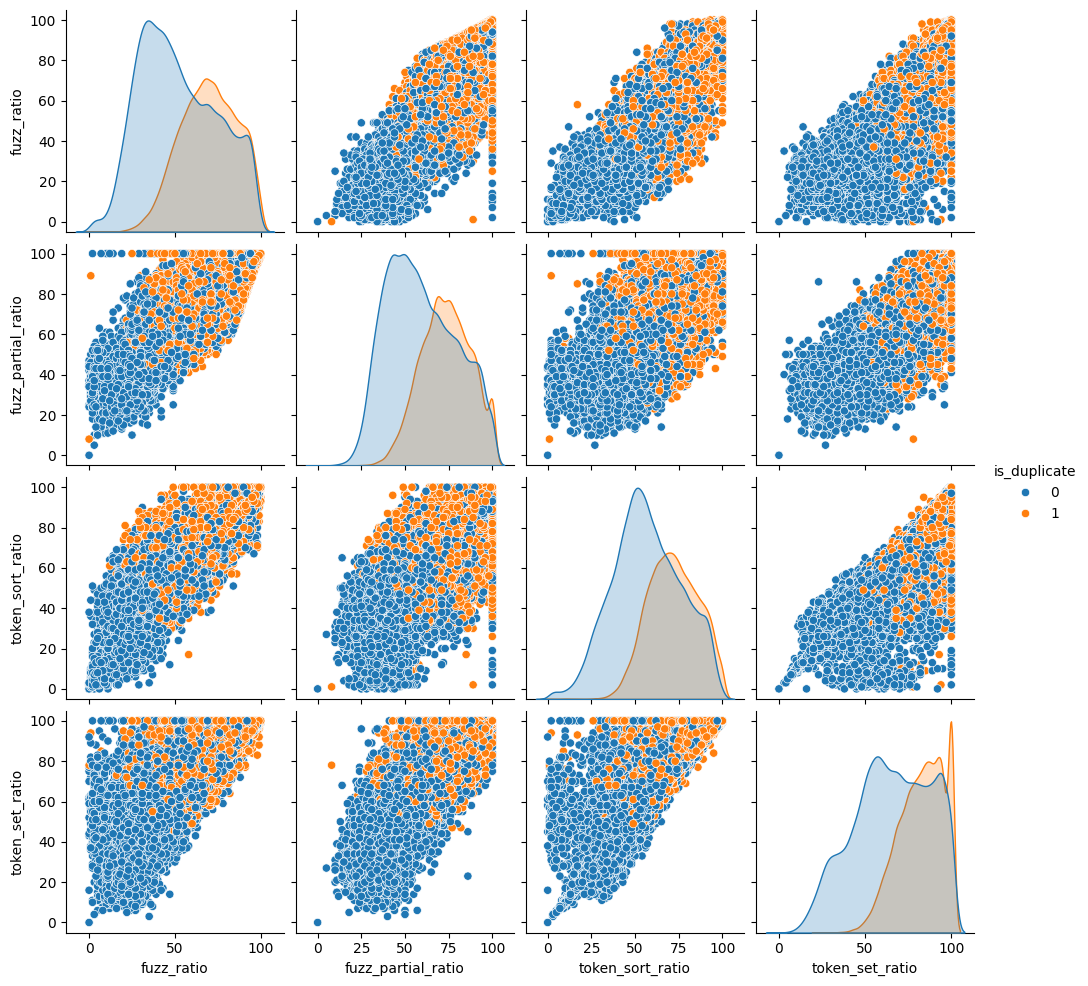

In [ ]:
sns.pairplot(sample_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
ques_df = sample_df[['question1','question2']]
ques_df.head()

,question1,question2
241448,can i laminate my social security card,why can not you laminate social security cards
113984,how do i go about getting a sugar daddy,how do i acquire a sugar daddy
135921,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...
240032,what is the difference between build and relea...,in software testing what is the difference be...
255965,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...


In [ ]:
final_df = sample_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(74996, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
241448,1,38,46,7,8,4,15,0.27,0.749981,0.749981,...,0.499994,0,0,1,7.5,0.538462,81,84,81,86
113984,1,39,30,9,7,6,16,0.38,0.666644,0.499988,...,0.666659,1,1,2,8.0,0.451613,75,57,72,85
135921,0,40,52,8,9,4,17,0.24,0.749981,0.499992,...,0.444440,0,1,1,8.5,0.512195,67,69,54,77
240032,0,68,84,11,18,9,26,0.35,0.599988,0.499992,...,0.599996,0,0,4,13.0,0.449275,53,61,72,89
255965,0,54,56,10,9,1,19,0.05,0.000000,0.000000,...,0.099999,0,0,1,9.5,0.054545,18,20,33,33


In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize the 'question1' and 'question2' columns and combine tokens for training the Word2Vec model
all_tokens = ques_df['question1'].apply(lambda x: word_tokenize(str(x).lower())).tolist() + ques_df['question2'].apply(lambda x: word_tokenize(str(x).lower())).tolist()

# Train Word2Vec model
# w2v_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=1, workers=4)
w2v_model = Word2Vec( vector_size=100, window=5,min_count=1)
w2v_model.build_vocab(all_tokens)
w2v_model.train(all_tokens, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)
print(len(w2v_model.wv.index_to_key))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


40894


In [ ]:

def get_avg_w2v(question, model):
    tokens = word_tokenize(str(question).lower())
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(vectors, axis=0)

# Apply function to get embeddings for question1 and question2
ques_df['q1_w2v'] = ques_df['question1'].apply(lambda x: get_avg_w2v(x, w2v_model))
ques_df['q2_w2v'] = ques_df['question2'].apply(lambda x: get_avg_w2v(x, w2v_model))


In [ ]:
ques_df.shape

(74996, 4)

In [ ]:
from scipy.spatial.distance import cosine

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    if np.all(vec1 == 0) or np.all(vec2 == 0):
        return 0.0
    return 1 - cosine(vec1, vec2)

# Calculate cosine similarity between q1_w2v and q2_w2v
ques_df['w2v_cosine_sim'] = ques_df.apply(lambda row: cosine_similarity(row['q1_w2v'], row['q2_w2v']), axis=1)


In [ ]:
ques_df.shape

(74996, 5)

In [ ]:
final_df.shape

(74996, 23)

In [ ]:
finalized_df = pd.concat([ques_df,final_df], axis=1)
print(finalized_df.shape)
finalized_df.head()



(74996, 28)


,question1,question2,q1_w2v,q2_w2v,w2v_cosine_sim,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
241448,can i laminate my social security card,why can not you laminate social security cards,"[-0.6561837, 0.18793358, -0.4963541, 0.7772140...","[-0.44928515, 0.14907776, -0.4763475, 0.643492...",0.686852,1,38,46,7,8,...,0.499994,0,0,1,7.5,0.538462,81,84,81,86
113984,how do i go about getting a sugar daddy,how do i acquire a sugar daddy,"[-1.297222, 0.26919782, -0.029567728, 0.456290...","[-1.0506637, 0.21966138, 0.032359008, 0.573666...",0.901051,1,39,30,9,7,...,0.666659,1,1,2,8.0,0.451613,75,57,72,85
135921,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...,"[0.00033765286, 0.21225947, 0.73248416, 0.5070...","[0.2635798, -0.26427022, 0.34861198, -0.039788...",0.795156,0,40,52,8,9,...,0.444440,0,1,1,8.5,0.512195,67,69,54,77
240032,what is the difference between build and relea...,in software testing what is the difference be...,"[0.60445684, -0.34167603, 0.082527086, 0.03983...","[0.31117696, -0.62782127, -0.06951244, -0.0633...",0.843212,0,68,84,11,18,...,0.599996,0,0,4,13.0,0.449275,53,61,72,89
255965,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...,"[-0.44107667, -0.2379374, -0.3982591, 1.386963...","[-0.69786906, -0.015247487, -0.087114066, 0.51...",0.670991,0,54,56,10,9,...,0.099999,0,0,1,9.5,0.054545,18,20,33,33


In [ ]:
print(list(finalized_df.columns))

['question1', 'question2', 'q1_w2v', 'q2_w2v', 'w2v_cosine_sim', 'is_duplicate', 'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common', 'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio']


# Feature Scaling

In [ ]:
print(list(finalized_df.columns))

['question1', 'question2', 'q1_w2v', 'q2_w2v', 'w2v_cosine_sim', 'is_duplicate', 'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common', 'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio']


In [ ]:
#Feature Scaling for numerical columns.

from sklearn.preprocessing import RobustScaler
numerical_features = finalized_df[[ 'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common', 'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio']]

# Perform Min-Max scaling on numerical features
scaler = RobustScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns, index=finalized_df.index)
remaining_features=finalized_df[['w2v_cosine_sim','is_duplicate']]

In [ ]:
# Extract the w2v vectors and flatten them into individual columns
q1_w2v_df = pd.DataFrame(finalized_df['q1_w2v'].values.tolist(), index=finalized_df.index).add_prefix('q1_w2v_')
q2_w2v_df = pd.DataFrame(finalized_df['q2_w2v'].values.tolist(), index=finalized_df.index).add_prefix('q2_w2v_')


In [ ]:
print(q1_w2v_df.shape)
print(q2_w2v_df.shape)

(74996, 100)
(74996, 100)


In [ ]:
q1_w2v_df.head()

,q1_w2v_0,q1_w2v_1,q1_w2v_2,q1_w2v_3,q1_w2v_4,q1_w2v_5,q1_w2v_6,q1_w2v_7,q1_w2v_8,q1_w2v_9,...,q1_w2v_90,q1_w2v_91,q1_w2v_92,q1_w2v_93,q1_w2v_94,q1_w2v_95,q1_w2v_96,q1_w2v_97,q1_w2v_98,q1_w2v_99
241448,-0.656184,0.187934,-0.496354,0.777214,-0.896916,0.081996,0.600958,2.018499,-0.139222,0.067588,...,-0.832877,-0.236027,-0.396035,0.338791,0.315922,-0.607200,1.006251,-0.438342,0.399261,0.207891
113984,-1.297222,0.269198,-0.029568,0.456291,-0.163010,-0.390453,0.690102,1.245694,-0.253322,0.656983,...,-0.541693,-0.063787,-0.338295,0.100492,0.855662,-0.447114,0.936128,0.202649,0.558555,0.055086
135921,0.000338,0.212259,0.732484,0.507079,-0.439522,-0.516786,0.946696,1.646021,-0.201913,0.037052,...,-0.086952,-0.319735,-0.213973,-0.405460,0.069855,-0.253976,0.640364,-0.050913,0.125879,0.382460
240032,0.604457,-0.341676,0.082527,0.039831,-0.575736,-0.335202,-0.070982,0.777760,-0.819255,-0.254277,...,0.713015,0.122807,-0.340227,0.280179,0.648793,0.148096,-0.183144,-0.327893,0.200962,-0.161375
255965,-0.441077,-0.237937,-0.398259,1.386964,0.538355,-0.306256,1.141528,0.732241,-0.549017,0.722552,...,-0.673012,-0.212907,-0.329613,0.796414,0.930436,0.675686,0.407301,-0.060650,-0.228245,0.818765


In [ ]:
# scaled_numerical_df.head()
print(scaled_numerical_df.shape)
print(sample_df.shape)

(74996, 22)
(74996, 28)


In [ ]:
scaled_numerical_df.head()

,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
241448,-0.393939,-0.121212,-0.500000,-0.333333,-0.25,-0.5,0.10,0.312479,0.600042,-0.492306,...,0.222216,0.0,-1.0,-0.25,-0.454545,0.598924,0.628571,0.655172,0.642857,0.354839
113984,-0.363636,-0.606061,-0.166667,-0.500000,0.25,-0.4,0.65,0.104133,0.000030,0.738437,...,0.666659,1.0,0.0,0.00,-0.363636,0.330295,0.457143,-0.275862,0.321429,0.322581
135921,-0.333333,0.060606,-0.333333,-0.166667,-0.25,-0.3,-0.05,0.312479,0.000040,-0.492306,...,0.074070,0.0,0.0,-0.25,-0.272727,0.517680,0.228571,0.137931,-0.321429,0.064516
240032,0.515152,1.030303,0.166667,1.333333,1.00,0.6,0.50,-0.062512,0.000040,0.738453,...,0.488890,0.0,-1.0,0.50,0.545455,0.323065,-0.171429,-0.137931,0.321429,0.451613
255965,0.090909,0.181818,0.000000,-0.166667,-1.00,-0.1,-1.00,-1.562512,-1.199995,-0.492306,...,-0.844441,0.0,-1.0,-0.25,-0.090909,-0.897864,-1.171429,-1.551724,-1.071429,-1.354839


In [ ]:
remaining_features.head()

,w2v_cosine_sim,is_duplicate
241448,0.686852,1
113984,0.901051,1
135921,0.795156,0
240032,0.843212,0
255965,0.670991,0


In [ ]:
finalized_df.head()

,question1,question2,q1_w2v,q2_w2v,w2v_cosine_sim,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
241448,can i laminate my social security card,why can not you laminate social security cards,"[-0.6561837, 0.18793358, -0.4963541, 0.7772140...","[-0.44928515, 0.14907776, -0.4763475, 0.643492...",0.686852,1,38,46,7,8,...,0.499994,0,0,1,7.5,0.538462,81,84,81,86
113984,how do i go about getting a sugar daddy,how do i acquire a sugar daddy,"[-1.297222, 0.26919782, -0.029567728, 0.456290...","[-1.0506637, 0.21966138, 0.032359008, 0.573666...",0.901051,1,39,30,9,7,...,0.666659,1,1,2,8.0,0.451613,75,57,72,85
135921,where can i buy marijuana seeds in india,where the best website to buy marijuana seeds ...,"[0.00033765286, 0.21225947, 0.73248416, 0.5070...","[0.2635798, -0.26427022, 0.34861198, -0.039788...",0.795156,0,40,52,8,9,...,0.444440,0,1,1,8.5,0.512195,67,69,54,77
240032,what is the difference between build and relea...,in software testing what is the difference be...,"[0.60445684, -0.34167603, 0.082527086, 0.03983...","[0.31117696, -0.62782127, -0.06951244, -0.0633...",0.843212,0,68,84,11,18,...,0.599996,0,0,4,13.0,0.449275,53,61,72,89
255965,do some women like having sex with trans sexua...,how do female to male gender reassignment surg...,"[-0.44107667, -0.2379374, -0.3982591, 1.386963...","[-0.69786906, -0.015247487, -0.087114066, 0.51...",0.670991,0,54,56,10,9,...,0.099999,0,0,1,9.5,0.054545,18,20,33,33


In [ ]:
# scaled_numerical_df.reset_index(drop=True, inplace=True)
# remaining_features[['q1_w2v', 'q2_w2v','is_duplicate']].reset_index(drop=True, inplace=True)
# # remaining_features[['is_duplicate']].reset_index(drop=True, inplace=True)

In [ ]:
target=pd.DataFrame(remaining_features['is_duplicate'],index=finalized_df.index)
print(target.shape)
print(target.head())

(74996, 1)
        is_duplicate
241448             1
113984             1
135921             0
240032             0
255965             0


In [ ]:
target_2=target['is_duplicate']

In [ ]:
# ML_df = pd.concat([scaled_numerical_df, remaining_features[['q1_w2v','q2_w2v']]], axis=1)
# Combine all features
ML_df = pd.concat([scaled_numerical_df, q1_w2v_df, q2_w2v_df, finalized_df[['w2v_cosine_sim']]], axis=1)
print(ML_df.shape)
ML_df.head()


(74996, 223)


,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,...,q2_w2v_91,q2_w2v_92,q2_w2v_93,q2_w2v_94,q2_w2v_95,q2_w2v_96,q2_w2v_97,q2_w2v_98,q2_w2v_99,w2v_cosine_sim
241448,-0.393939,-0.121212,-0.500000,-0.333333,-0.25,-0.5,0.10,0.312479,0.600042,-0.492306,...,-0.429038,0.155288,-0.007432,0.566972,-0.302850,0.570801,0.706793,-0.089414,0.709416,0.686852
113984,-0.363636,-0.606061,-0.166667,-0.500000,0.25,-0.4,0.65,0.104133,0.000030,0.738437,...,-0.028813,0.220350,0.157062,0.819045,-0.221040,0.773082,0.095849,0.180960,0.202595,0.901051
135921,-0.333333,0.060606,-0.333333,-0.166667,-0.25,-0.3,-0.05,0.312479,0.000040,-0.492306,...,-0.097336,0.697154,-0.513352,0.542276,-0.009018,0.077979,-0.404921,0.160229,0.078131,0.795156
240032,0.515152,1.030303,0.166667,1.333333,1.00,0.6,0.50,-0.062512,0.000040,0.738453,...,0.254255,-0.317602,0.252227,0.928911,0.159096,-0.199975,-0.174567,-0.049863,0.050507,0.843212
255965,0.090909,0.181818,0.000000,-0.166667,-1.00,-0.1,-1.00,-1.562512,-1.199995,-0.492306,...,-0.294925,0.237312,0.271302,0.587018,-0.154203,0.680813,0.290862,0.135695,0.292586,0.670991


# Trainig With Machine Learning Algorithm

In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split

# splitting the data between training set and testing data set.
X_train, X_test, y_train, y_test = train_test_split(ML_df, target_2, test_size=0.1, random_state=0)
print(X_train.head())
print(list(X_train.columns))
# print(list(y_train.columns))
y_train.head()

          q1_len    q2_len  q1_num_words  q2_num_words  word_common  \
239207 -0.333333 -0.060606      0.000000      0.166667         0.00   
129395  0.090909  1.242424      0.000000      1.500000         0.25   
155716 -0.424242  0.181818     -0.333333      0.333333        -1.25   
208537  0.303030 -0.545455      0.166667     -0.666667        -0.25   
313167 -0.939394 -0.969697     -1.000000     -1.000000        -0.50   

        word_total  word_share   cwc_min   cwc_max   csc_min  ...  q2_w2v_91  \
239207         0.1       -0.05  0.104133 -0.239970 -0.184609  ...  -0.203315   
129395         0.7       -0.15  0.312479 -0.399967 -0.184609  ...  -0.159848   
155716        -0.1       -1.25 -1.562512 -1.199995 -1.107670  ...   0.345148   
208537        -0.4        0.00  0.104133 -0.239970  0.123058  ...   0.106265   
313167        -1.2        0.65  0.937288  0.000000  0.738391  ...   0.522016   

        q2_w2v_92  q2_w2v_93  q2_w2v_94  q2_w2v_95  q2_w2v_96  q2_w2v_97  \
239207  -0.53361

239207    1
129395    1
155716    0
208537    1
313167    0
Name: is_duplicate, dtype: int64

In [ ]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 67496 entries, 239207 to 182536
Columns: 223 entries, q1_len to w2v_cosine_sim
dtypes: float32(200), float64(23)
memory usage: 63.9 MB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 67496 entries, 239207 to 182536
Series name: is_duplicate
Non-Null Count  Dtype
--------------  -----
67496 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB


In [ ]:
import sklearn; print(sklearn.__version__)

1.2.2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy of RandomForest Algorithm: {accuracy_score(y_test, y_pred)}")

Accuracy of RandomForest Algorithm: 0.8132


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)
print(f"Accuracy of XGBClassifier: {accuracy_score(y_test, y_pred)}")

Accuracy of XGBClassifier: 0.815


In [ ]:
from sklearn.metrics import confusion_matrix

# for random forest model
print("Confusion Matrix for RandomForest Algorithm")
confusion_matrix(y_test,y_pred)

Confusion Matrix for RandomForest Algorithm


array([[6464, 1078],
       [1142, 3316]])

In [ ]:
# forXGBClassifier model
print("Confusion Matrix for XGBClassifier Algorithm")
confusion_matrix(y_test,y_pred1)

Confusion Matrix for XGBClassifier Algorithm


array([[6453, 1089],
       [1156, 3302]])

In [ ]:
# Using SVM Cloassifier With Hyperparameter tuning and Cross Validation Technique


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the SVM classifier
svc = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

# Predict and evaluate
best_svc = grid_search.best_estimator_
y_pred_2 = best_svc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

In [ ]:
def text_preprocessing(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    q = q.replace('?', '')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    # q = q.replace("'s", " is")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    # q=  " ".join([ps.stem(word) for word in q.split()])


    return q

In [ ]:
pip install fuzzywuzzy


In [ ]:
pip install Distance

In [ ]:
from fuzzywuzzy import fuzz
import distance

def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))


def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

def get_avg_w2v(question, model):
    tokens = word_tokenize(str(question).lower())
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(vectors, axis=0)

In [ ]:
# Query_point_Creator
from scipy.spatial.distance import cosine
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
# Fuzzy Features
from fuzzywuzzy import fuzz
import distance
def query_point_creator(q1,q2):
    input_query = []

    # preprocess
    q1 = text_preprocessing(q1)
    q2 = text_preprocessing(q2)

    # fetch basic features
    input_query.append(len(q1)) # get length of q1 Feature 1
    input_query.append(len(q2)) # get length of q2 Feature 2

    input_query.append(len(q1.split(" "))) # get total words in q1 Feature 3
    input_query.append(len(q2.split(" "))) # get total words in q2 Feature 4

    input_query.append(test_common_words(q1,q2)) # Feature 5
    input_query.append(test_total_words(q1,q2))  # Feature 6
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2)) # word share Feature 7

    # fetch token features
    token_features = test_fetch_token_features(q1,q2) # total 8 features
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2) # total 3 features
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2) # total 4 features
    input_query.extend(fuzzy_features)

    #wordtovec
    # Tokenize and get vectors for q1
    q1_tokens = word_tokenize(str(q1).lower())
    q1_vectors = [w2v_model.wv[token] for token in q1_tokens if token in w2v_model.wv]
    if len(q1_vectors) == 0:
        q1_w2v = np.zeros(w2v_model.vector_size)
    else:
        q1_w2v = np.mean(q1_vectors, axis=0)

    q1_w2v.reshape(1,-100)
    # print("Q1 vector :",q1_w2v)
    # print("Q1 vector type :",type(q1_w2v))
    # print("Q1 shape : ",q1_w2v.shape)
    # Tokenize and get vectors for q2
    q2_tokens = word_tokenize(str(q2).lower())
    q2_vectors = [w2v_model.wv[token] for token in q2_tokens if token in w2v_model.wv]
    if len(q2_vectors) == 0:
        q2_w2v = np.zeros(w2v_model.vector_size)
    else:
        q2_w2v = np.mean(q2_vectors, axis=0)

    q2_w2v.reshape(1,-100)
    # print("Q2 vector :",q2_w2v)
    # print("Q2 vector type :",type(q2_w2v))
    # print("Q2 shape : ",q2_w2v.shape)
    # Concatenate the vectors
    # combined_vector = np.hstack((q1_w2v, q2_w2v))

    # Calculate cosine similarity using scipy
    cosine_sim = 1 - cosine(q1_w2v, q2_w2v)
    cosine_sim = np.array([cosine_sim]).reshape(1, -1)
    # input_query.append(cosine_sim)
    # Reshape to (1, 200)
    # return combined_vector.reshape(1, -200)

    # Reshape q1_w2v and q2_w2v to (1, 100) to make them 2-dimensional
    q1_w2v = q1_w2v.reshape(1, -1)
    q2_w2v = q2_w2v.reshape(1, -1)

    # Combine input_query with q1_w2v and q2_w2v
    input_query = np.array(input_query).reshape(1, -1)
    combined_vector = np.hstack((input_query, q1_w2v, q2_w2v,cosine_sim))



    return combined_vector





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
q1 = 'Where is the capital of India'
q2 = 'What is the current capital of Pakistan'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
print(query_point_creator(q1,q2).shape)

(1, 223)


In [ ]:
clf.predict(query_point_creator(q1,q3))

array([1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = '/content/drive/MyDrive/Machine_Learning_Models_Udemy/NLP_Campus_X/NLP_Project-Duplicate_Question_pair'
if os.path.exists(path):
    print("Path exists!")
else:
    print("Path does not exist.")

Path exists!


In [ ]:
import pickle


clf_path = os.path.join(path, 'ML_model.pkl')
w2v_model_path = os.path.join(path, 'word2vec_model.pkl')

with open(clf_path, 'wb') as f:
    pickle.dump(clf, f)

with open(w2v_model_path, 'wb') as f:
    pickle.dump(w2v_model, f)

print("Models saved successfully!")

# pickle.dump(rf,open('model.pkl','wb'))
# pickle.dump(clf,open('/content/drive/MyDrive/Machine_Learning_Models_Udemy/NLP_Campus_X/NLP_Project-Duplicate_Question_pair/model.pkl'),'wb')
# pickle.dump(cv,open('cv.pkl','wb'))
# pickle.dump(w2v_model,open('/content/drive/MyDrive/Machine_Learning_Models_Udemy/NLP_Campus_X/NLP_Project-Duplicate_Question_pair/word2vec_model.pkl'),'wb')

Models saved successfully!
